# 1. import library

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

# 2. uplad file

In [ ]:
from google.colab import files

files.upload()

# 3. read csv file

In [ ]:
nbastat = pd.read_csv('nbastat2022.csv')
print(type(nbastat))

<class 'pandas.core.frame.DataFrame'>


# 4. 줄 수 세기 --> m

In [ ]:
m = len(nbastat)
m

249

# 5. feature 선택 --> FGA,3PA,FTA,PTS

In [ ]:
# x1 : FGA
x1 = nbastat[['FGA']]
# x2 : 3PA
x2 = nbastat[['3PA']]
# x3 : FTA
x3 = nbastat[['FTA']]
# y : PTS
y = nbastat[['PTS']]

print(type(y))

<class 'pandas.core.frame.DataFrame'>


# 6. 결측값 제거

In [ ]:
x1 = x1.dropna(axis=0) # 결측값을 포함한 행을 삭제
x2 = x2.dropna(axis=0)
x3 = x3.dropna(axis=0)
y = y.dropna(axis=0)

m = len(x1) # count를 다시 반영

# 7. pandas의 dataframe --> np의 array

In [ ]:
x1 = (np.array(x1)).reshape(m,1)
x2 = (np.array(x2)).reshape(m,1)
x3 = (np.array(x3)).reshape(m,1)
y = (np.array(y)).reshape(m,1)

type(x1)

numpy.ndarray

# 8. 변수 설정: Xb = (1, x1, x2, x3)

In [ ]:
# 열이 1인 vector 만들기
x0 = np.ones((m,1))
Xb = np.c_[x0,x1,x2,x3]

print(x1.shape)
print(Xb.shape)

(248, 1)
(248, 4)


# 9. hyperparameter 를 준비

In [ ]:
learning_rate = 0.00001

n_iter = 2000

# 10. parameter 를 초기화

In [ ]:
theta = np.zeros((4,1))
gradients = np.zeros((4,1))

theta.shape

(4, 1)

# 11. J(loss 함수) 계산

In [ ]:
def compute_J (theta,Xb,y):
  # loss vector : 예측값 - 실측값
  # 예측값 : theta * Xb --> Xb.dot(theta)
  # 실측값 : y
  loss_vector = Xb.dot(theta) - y
  loss_vector = loss_vector.reshape(-1)
  # loss_vecotr의 제곱
  loss2 = np.square(loss_vector)
  # 더하고 (1/2m) 곱하기
  loss_sum = np.sum(loss2)/(2*m)
  return loss_sum

# 12. 훈련

In [ ]:
loss_arr = []
for i in range(n_iter):
  # gradient 계산
  gradient = (1.0/m)*Xb.T.dot(Xb.dot(theta)-y)
  # gradient descent method 적용
  theta = theta - learning_rate *gradient
  # loss 계산
  loss = compute_J(theta,Xb,y)
  # loss 값 저장
  loss_arr.append(loss)
print(loss_arr)

[91.10299399353684, 90.85265474798035, 90.60301257453897, 90.35406553177894, 90.10581168367365, 89.85824909958858, 89.61137585426633, 89.36519002781154, 89.11968970567614, 88.87487297864429, 88.63073794281755, 88.38728269960016, 88.14450535568425, 87.90240402303502, 87.6609768188761, 87.42022186567496, 87.18013729112826, 86.94072122814731, 86.70197181484345, 86.46388719451373, 86.22646551562637, 85.98970493180629, 85.75360360182088, 85.51815968956564, 85.28337136404988, 85.04923679938246, 84.81575417475759, 84.58292167444068, 84.35073748775432, 84.1191998090639, 83.88830683776396, 83.65805677826386, 83.42844783997396, 83.19947823729167, 82.97114618958757, 82.74344992119151, 82.51638766137889, 82.28995764435678, 82.06415810925022, 81.8389873000886, 81.61444346579188, 81.39052486015706, 81.16722974184452, 80.94455637436461, 80.72250302606392, 80.50106797011205, 80.28024948448798, 80.06004585196686, 79.84045536010645, 79.62147630123398, 79.40310697243278, 79.185345675529, 78.9681907170785

# 13. 결과 출력

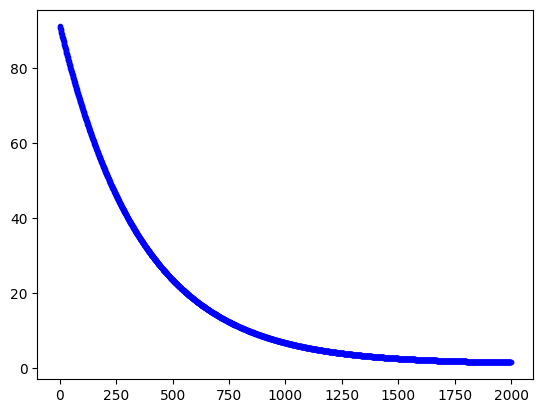

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_arr,'.b')

In [ ]:
# error 출력 : error = (예측값 - 실측값)^2 의 평균

y_hat = Xb.dot(theta)

error = (1/len(y_hat))*(y_hat-y).T.dot(y_hat - y)

print(error)

[[2.94397958]]
